# Imports

In [1]:
import numpy as np
import pandas as pd
from pyedflib import EdfReader
import mne

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import copy
import os
import importlib

import generisAPI
importlib.reload(generisAPI)

from generisAPI.file_operators import *
from generisAPI.preprocessing import *
from generisAPI.analysis import *
from generisAPI.plots import *

d:\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Compilation

In [2]:
global patient_root_path,control_root_path
patient_root_path='Generis/V6/Generis V6/Subjects'

temp=EdfReader(patient_root_path+'/'+'2'+'/'+'2'+'/'+'Phase 1.edf')
electrodes=temp.getSignalLabels()
temp.close()

all_patients_trials_data = xtract_all_subjects(patient_root_path)
all_patients_annotation = annotationXtractor().all_subjects(patient_root_path)

In [3]:
electrodes=['Fp1','FpZ','Fp2','F7','F8','T7','T8','P7','P8','O1','O2','OZ','FZ','PZ','CZ','F3','F4','P3','P4','C3','C4']
len(electrodes)

21

# Preprocessing

In [4]:
all_subjects_baseline_correction(all_patients_trials_data)

# Phase4 MMN

## all subjects

#### data

In [5]:
mmn_epoch=Epoch(100,1.3)
sp4_epochs=mmn_epoch.all_subject_phase_epochs(4,all_patients_trials_data,all_patients_annotation,0.2)

sp4_epochs_filtered = filter_epochs(sp4_epochs,1,30,100)

sp4_epochs_average = mmn_epoch.average_epochs(sp4_epochs_filtered)

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 3312 out of 3312 | elapsed:    2.0s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 19152 out of 19152 | elapsed:   10.7s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5472 out of 5472 | elapsed:    3.4s finished


#### cartesian plot

In [34]:
_Fs=100
def plot_by_channels(t0,t1,offset,data,electrodes,fig_size=(20,10)):
    assert isinstance(data,dict)
    if (t0<0) or (t0-offset<0):
        t0 = int(t0*_Fs)
        t1 = int(t1*_Fs)
    else:
        t0 = int((t0-offset)*_Fs)
        t1 = int((t1-offset)*_Fs)
    offset=int(offset*_Fs)
    # no_chs = data[list(data.keys())[0]].shape[0]
    no_chs = len(electrodes)
    if no_chs <= 8:
        n_rows = 2
    elif no_chs <= 16:
        n_rows = 4
    elif no_chs <= 24:
        n_rows = 6
    n_cols = int(no_chs/n_rows)
    fig, ax = plt.subplots(n_rows,n_cols,figsize=fig_size)

    for r in range(n_rows):
        for c in range(n_cols):
            lgnd=list()
            for k in data.keys():
                # if k != ' ':
                lgnd.append(k)
                ax[r,c].plot(data[k][(r*n_cols)+c,t0:t1],'--')
                plt.legend(lgnd)
                ax[r,c].set_xticks(list(range(0,data[k][(r*n_cols)+c,t0:t1].shape[0],10)))
                # ax[r,c].set_xticklabels(list(range(-1*offset,t1-offset+10,10)))
                ax[r,c].set_xticklabels(list(range(t0,t1,10)))
                ax[r,c].set_title(electrodes[(r*n_cols)+c])
                ax[r,c].set_xlabel('ms')
                ax[r,c].set_ylabel('uV')

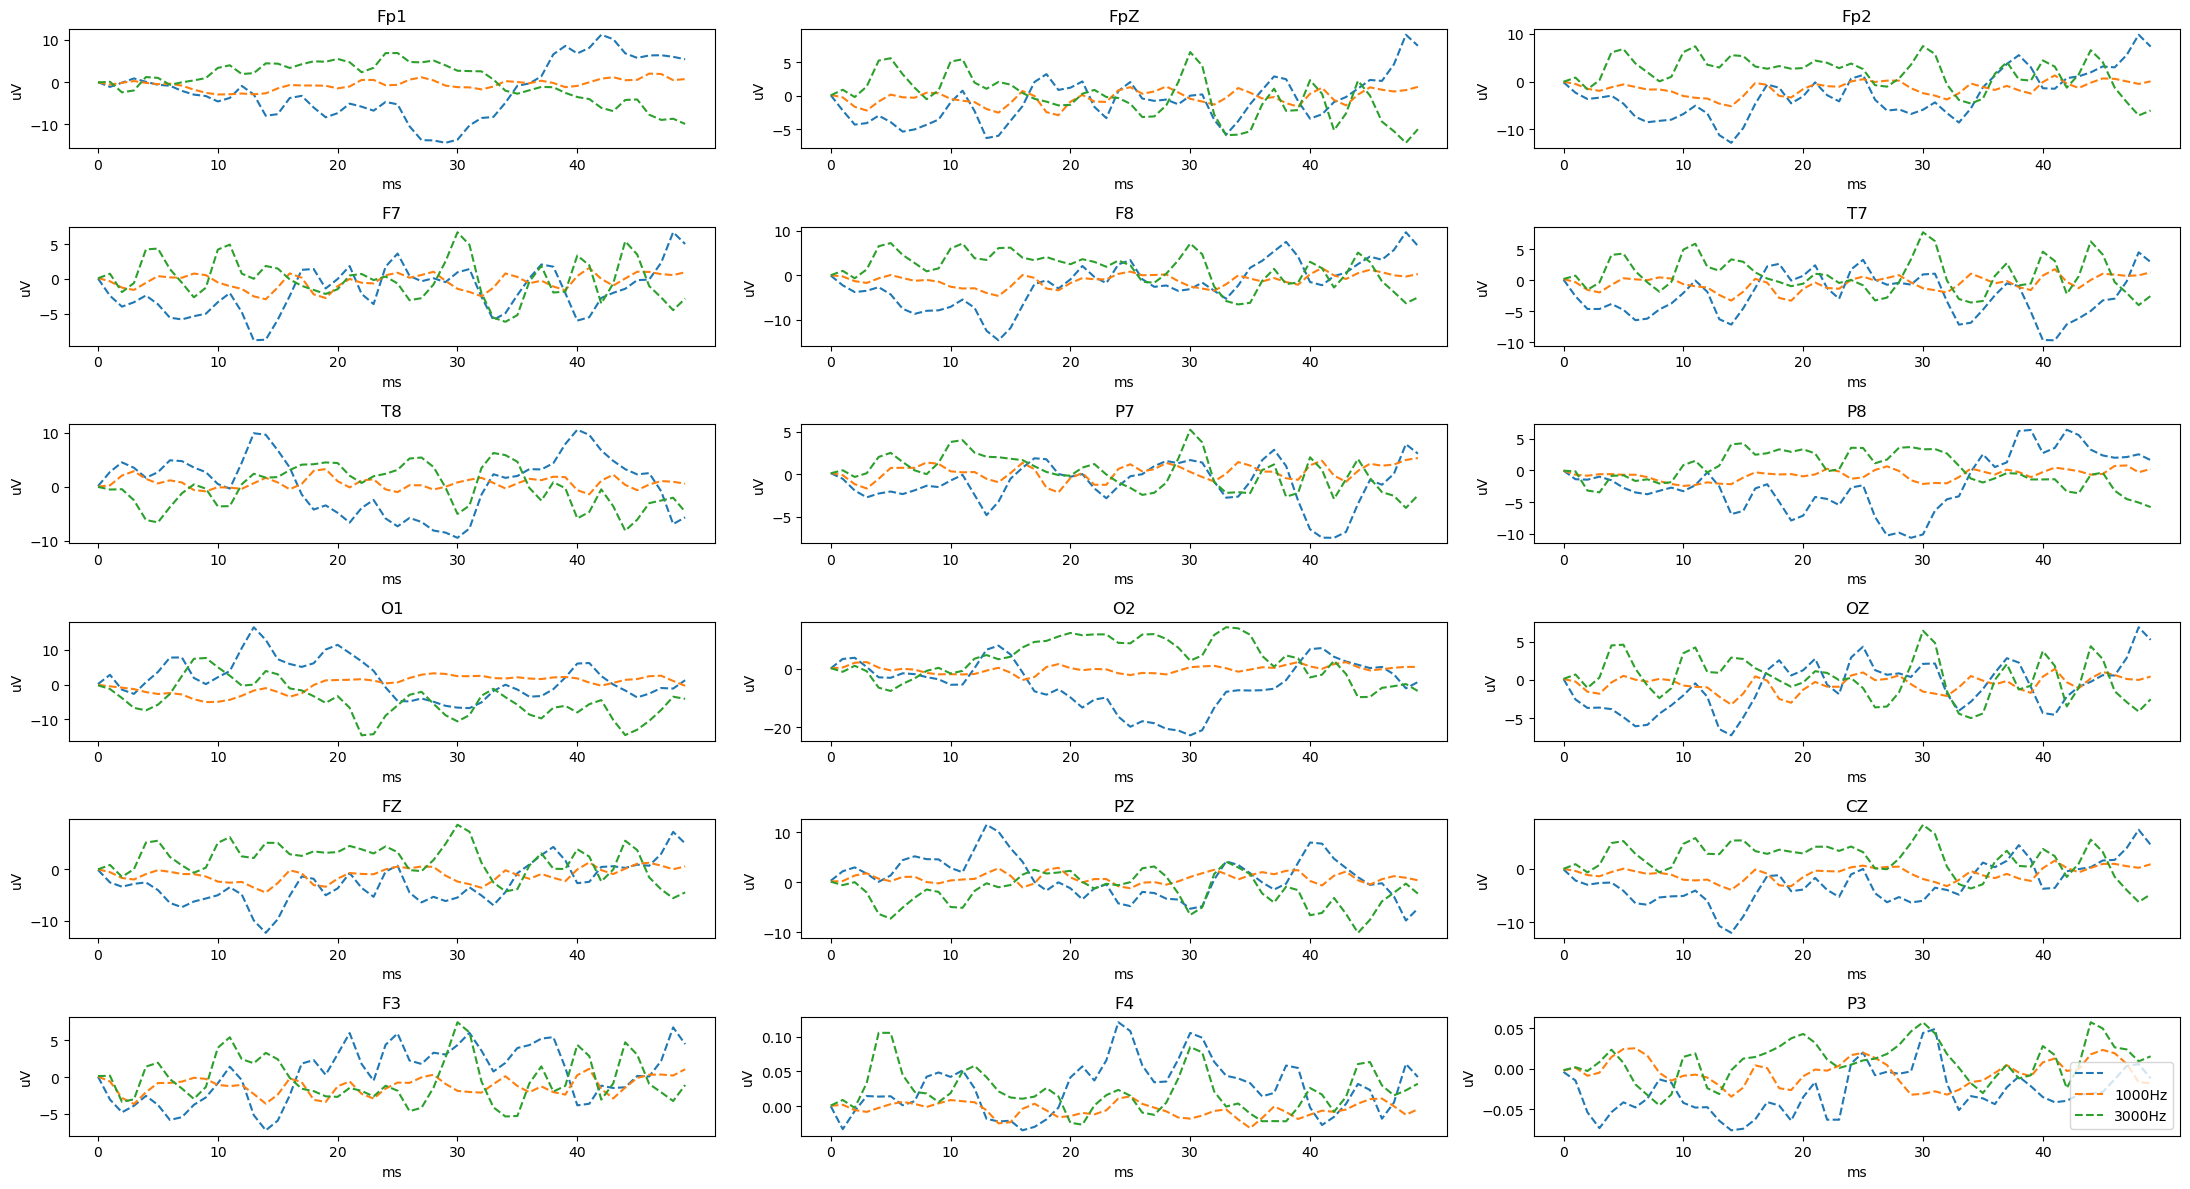

In [6]:
mmn_epoch.plot_by_channels(0,0.5,0.2,sp4_epochs_average[0],electrodes,(22,12))
# plot_by_channels(0,0.5,0.2,sp4_epochs_average[0],electrodes,(22,12))

#### montage plot

In [7]:
print(sp4_epochs_average[0].keys(), ', ', len(sp4_epochs_average[0].keys()))

dict_keys([' ', '1000Hz', '3000Hz']) ,  3


In [8]:
_Fs=100

def extract_eeg_time_window(eeg_samples,t0,t1,offset=0,_Fs=100):
    if (t0<0) or (t0-offset<0):
        t0 = int(t0*_Fs)
        t1 = int(t1*_Fs)
    else:
        t0 = int((t0-offset)*_Fs)
        t1 = int((t1-offset)*_Fs)
    return eeg_samples[:,t0:t1]

def time_montage_plot(eeg_samples,electrodes,t0,t1,offset,_Fs,fig_size=(6,6)):
    assert isinstance(eeg_samples,dict)
    for k in eeg_samples:
        try:
            assert eeg_samples[k][0:21,:].shape[0] == len(electrodes)
            print(extract_eeg_time_window(eeg_samples[k][0:21,:],t0,t1,offset,_Fs).shape)
        except AssertionError:
            print(eeg_samples[k].shape,', ', len(electrodes))
    n_rows = len(eeg_samples)
    n_cols = int((t1-t0)*_Fs)

    print(n_rows,n_cols)

    fig,ax = plt.subplots(n_rows,n_cols,figsize=fig_size)

    for r,k in enumerate(eeg_samples.keys()):
        for t in range(n_cols):
            # print(r,t)
            montage_plot(
                extract_eeg_time_window(eeg_samples[k][0:21,:],t0,t1,offset,_Fs)[:,t],
                electrodes,ax[r,t])
    plt.show()

(21, 2)
(21, 2)
(21, 2)
3 2


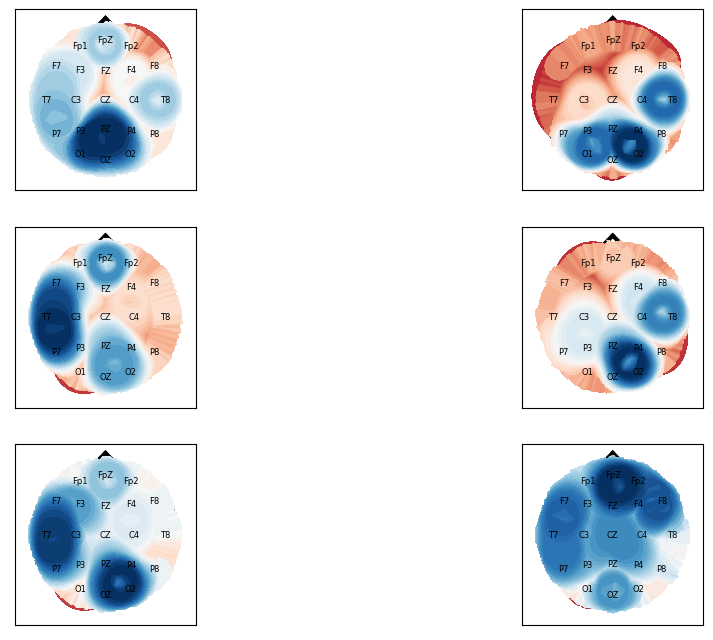

In [9]:
time_montage_plot(sp4_epochs_average[0],electrodes,0,0.03,0.2,100)

## subject specific

### simiat

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 1104 out of 1104 | elapsed:    0.3s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 6336 out of 6336 | elapsed:    2.4s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1872 out of 1872 | elapsed:    0.5s finished


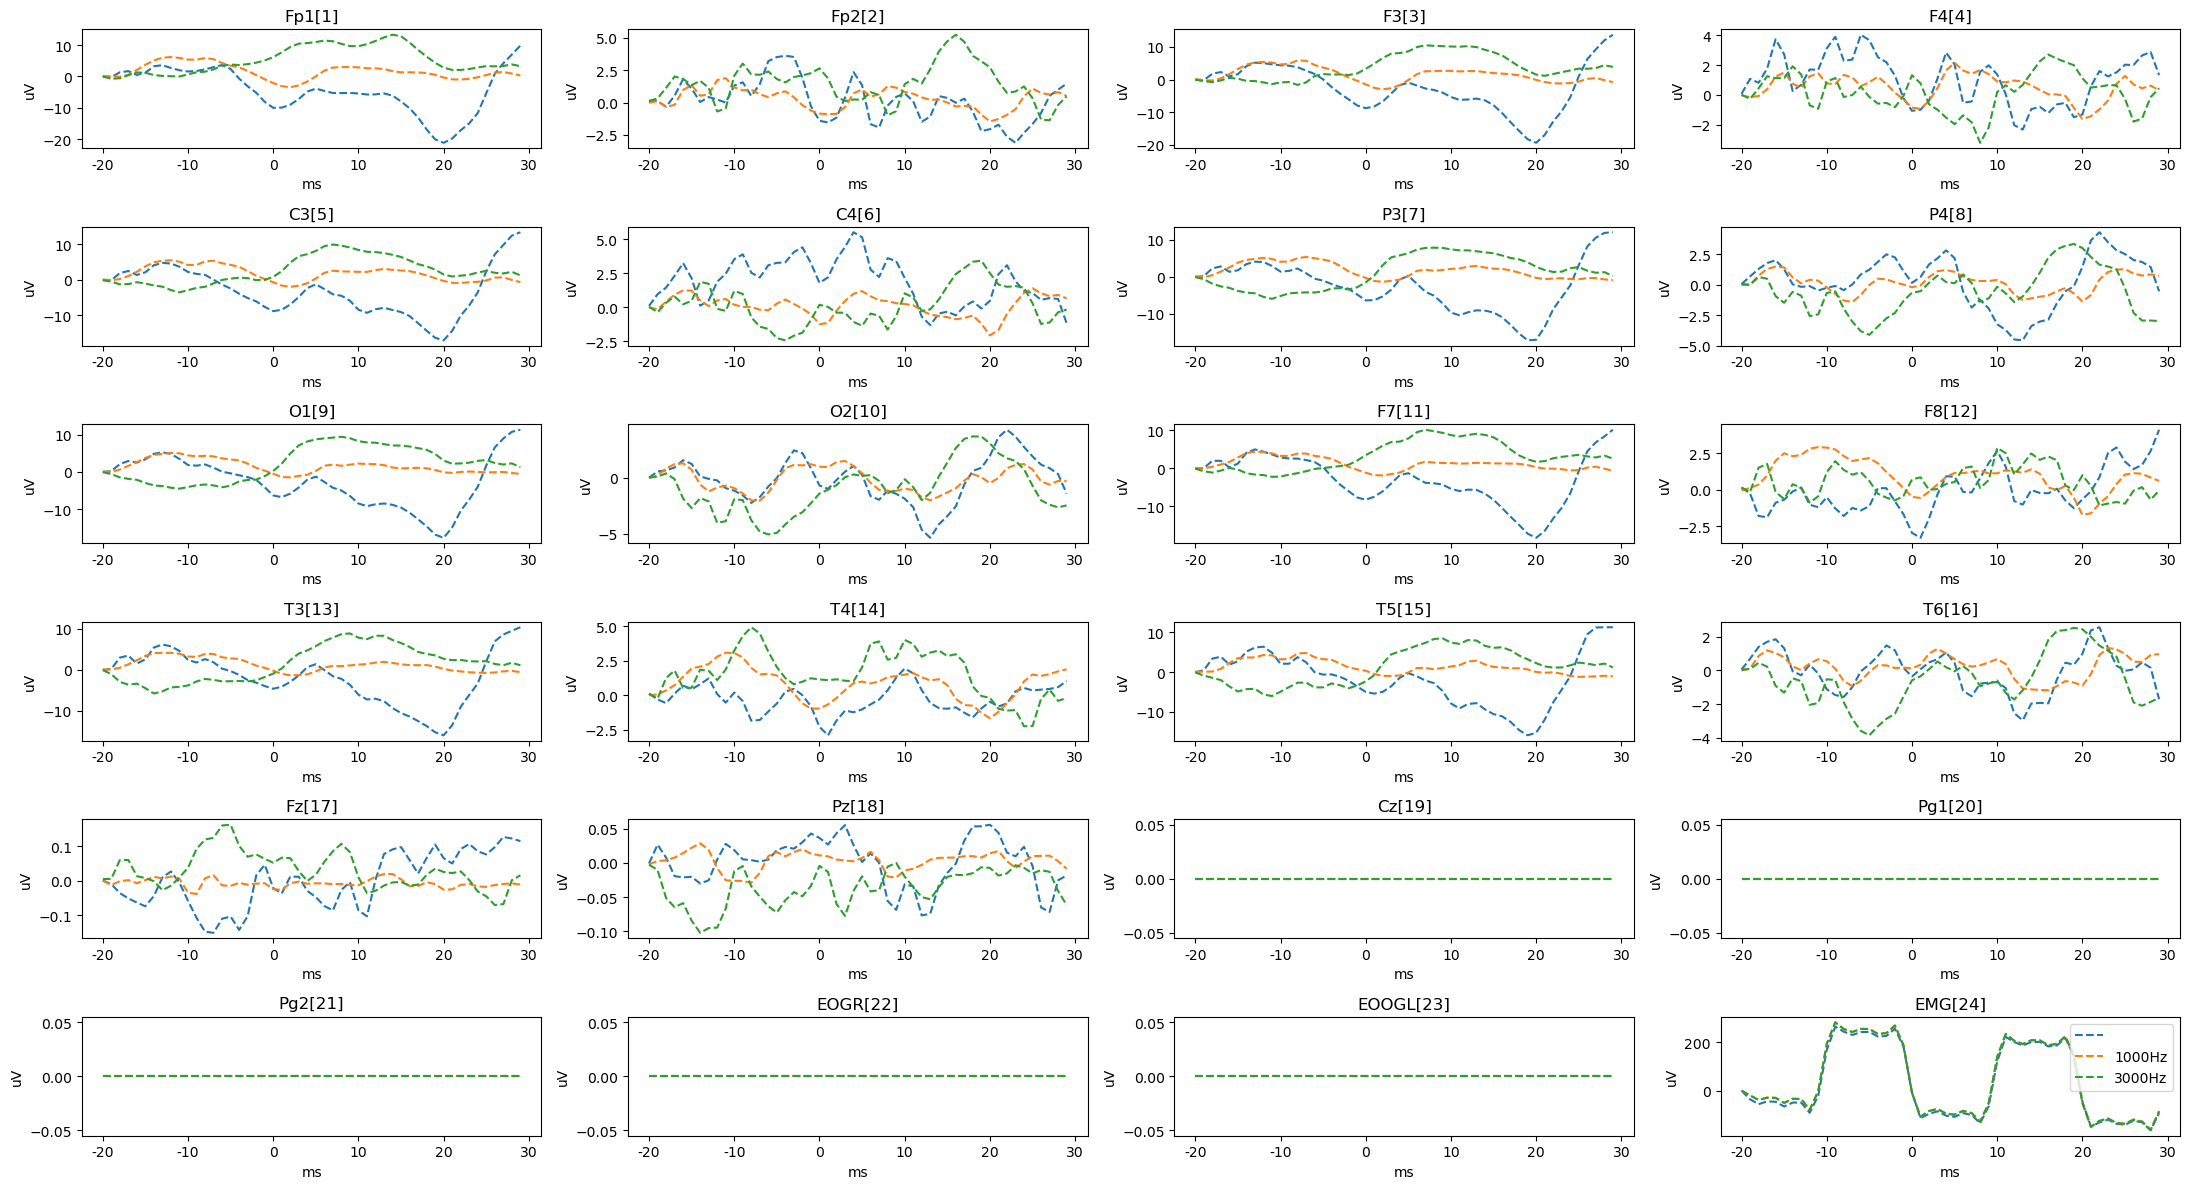

In [6]:
s_mmn_epoch=Epoch(100,1.3)

s2p4_epochs=s_mmn_epoch.subject_phase_epochs(0,4,all_patients_trials_data,all_patients_annotation,0.3)

s2p4_epochs_filtered = filter_epochs(s2p4_epochs,1,30,100)

s2p4_epochs_average = s_mmn_epoch.average_epochs(s2p4_epochs_filtered)

mmn_epoch.plot_by_channels(0,50,0.2,s2p4_epochs_average[0],electrodes,(22,12))

### feyisayo

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 1104 out of 1104 | elapsed:    0.3s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 6336 out of 6336 | elapsed:    2.4s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1872 out of 1872 | elapsed:    0.6s finished


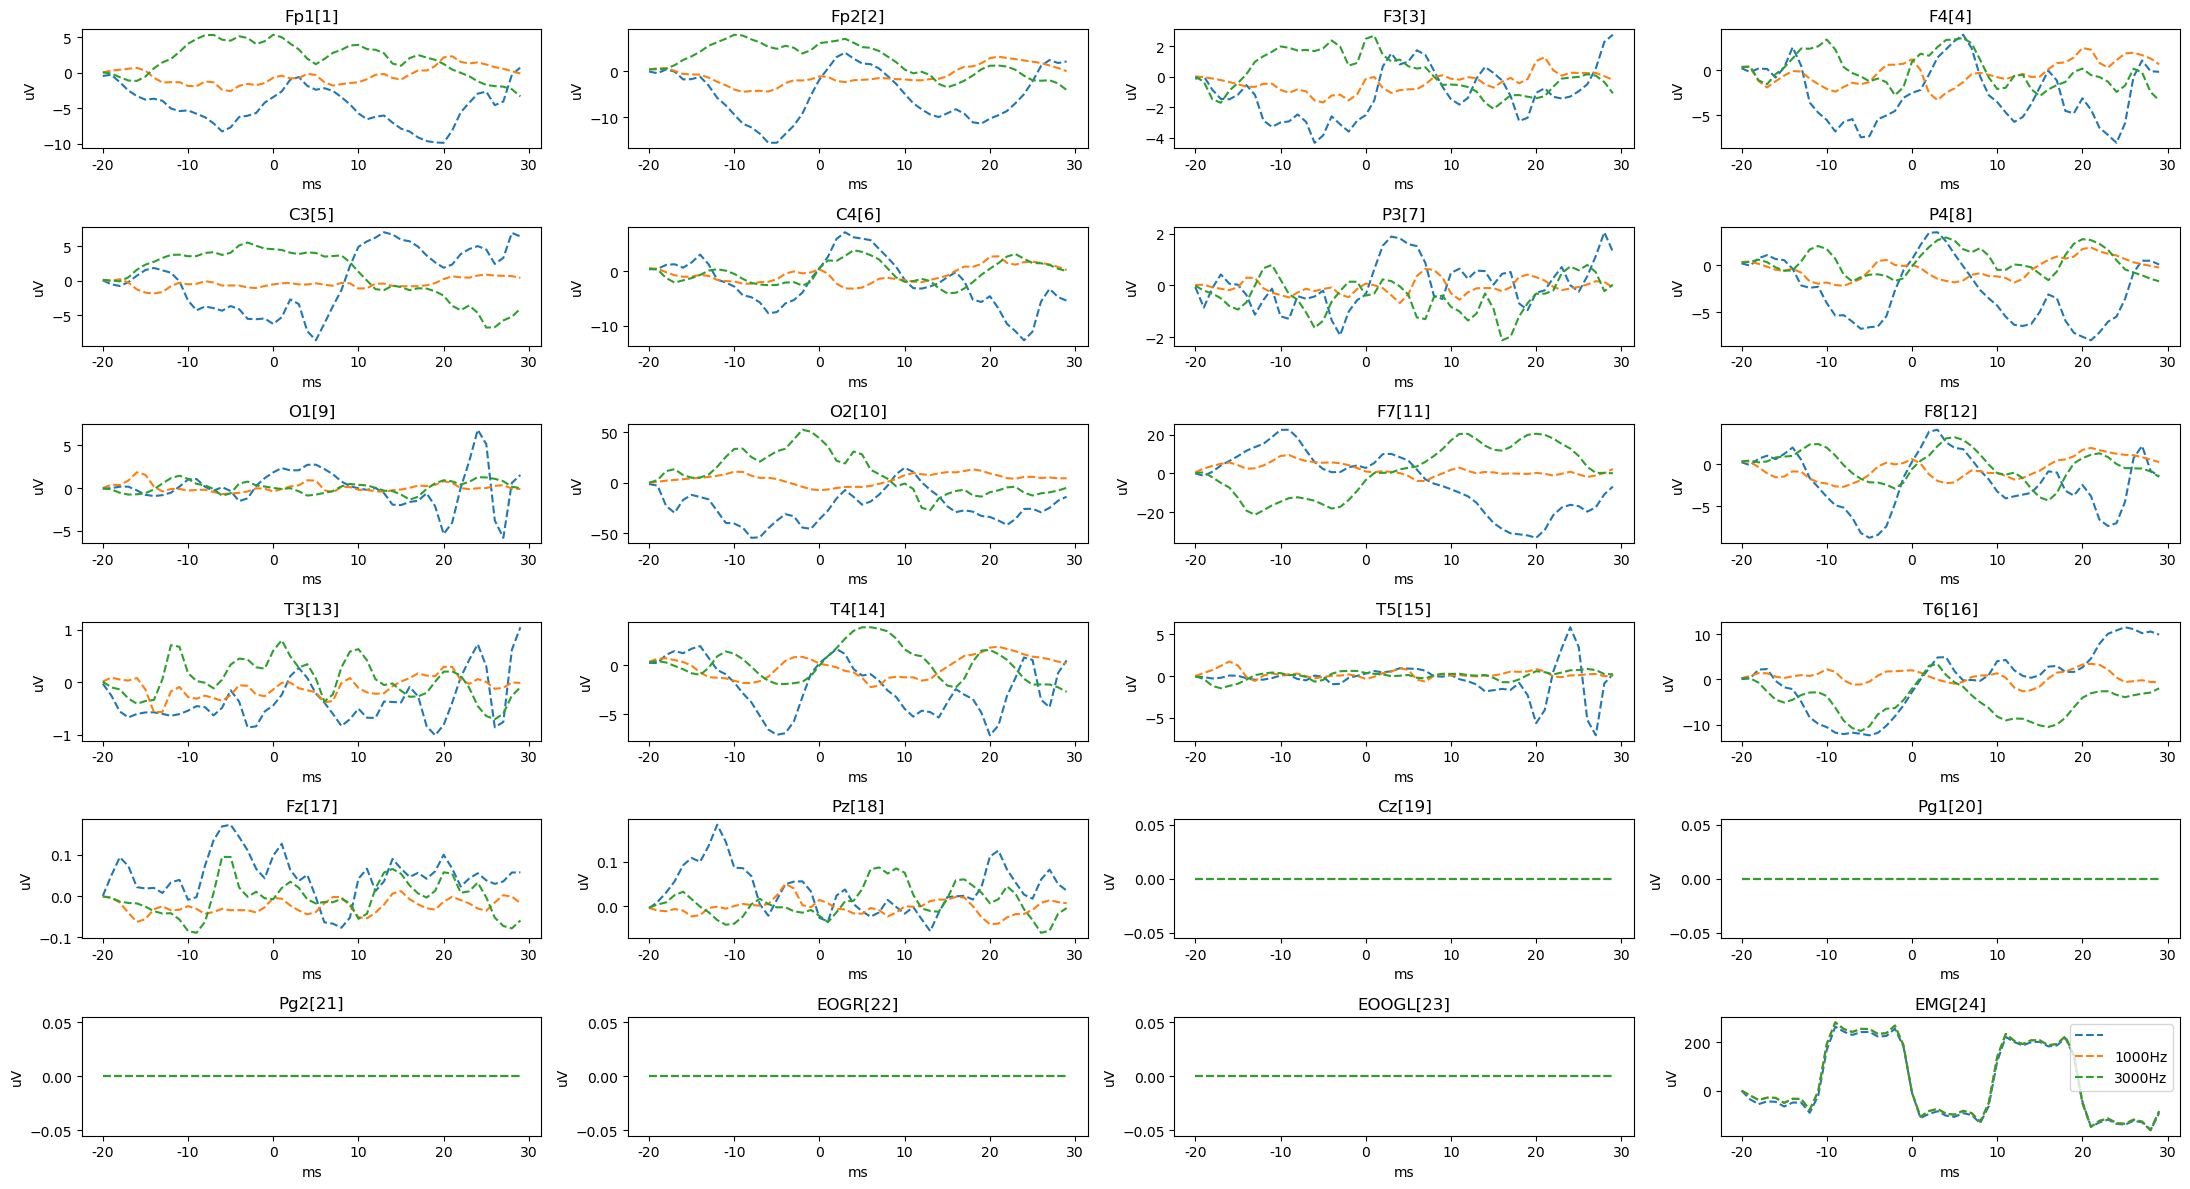

In [7]:
s_mmn_epoch=Epoch(100,1.3)

s3p4_epochs=s_mmn_epoch.subject_phase_epochs(1,4,all_patients_trials_data,all_patients_annotation,0.3)

s3p4_epochs_filtered = filter_epochs(s3p4_epochs,1,30,100)

s3p4_epochs_average = s_mmn_epoch.average_epochs(s3p4_epochs_filtered)

mmn_epoch.plot_by_channels(0,50,0.2,s3p4_epochs_average[0],electrodes,(22,12))

### abimbola

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 1104 out of 1104 | elapsed:    0.3s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Done 6336 out of 6336 | elapsed:    2.2s finished
d:\Emmanuel_petron_Olateju\MMN_SZ\generisAPI\preprocessing.py:18: RuntimeWarning: filter_length (331) is longer than the signal (130), distortion is likely. Reduce filter length or filter a longer signal.
  return filter.transform(epoch)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1872 out of 1872 | elapsed:    0.6s finished


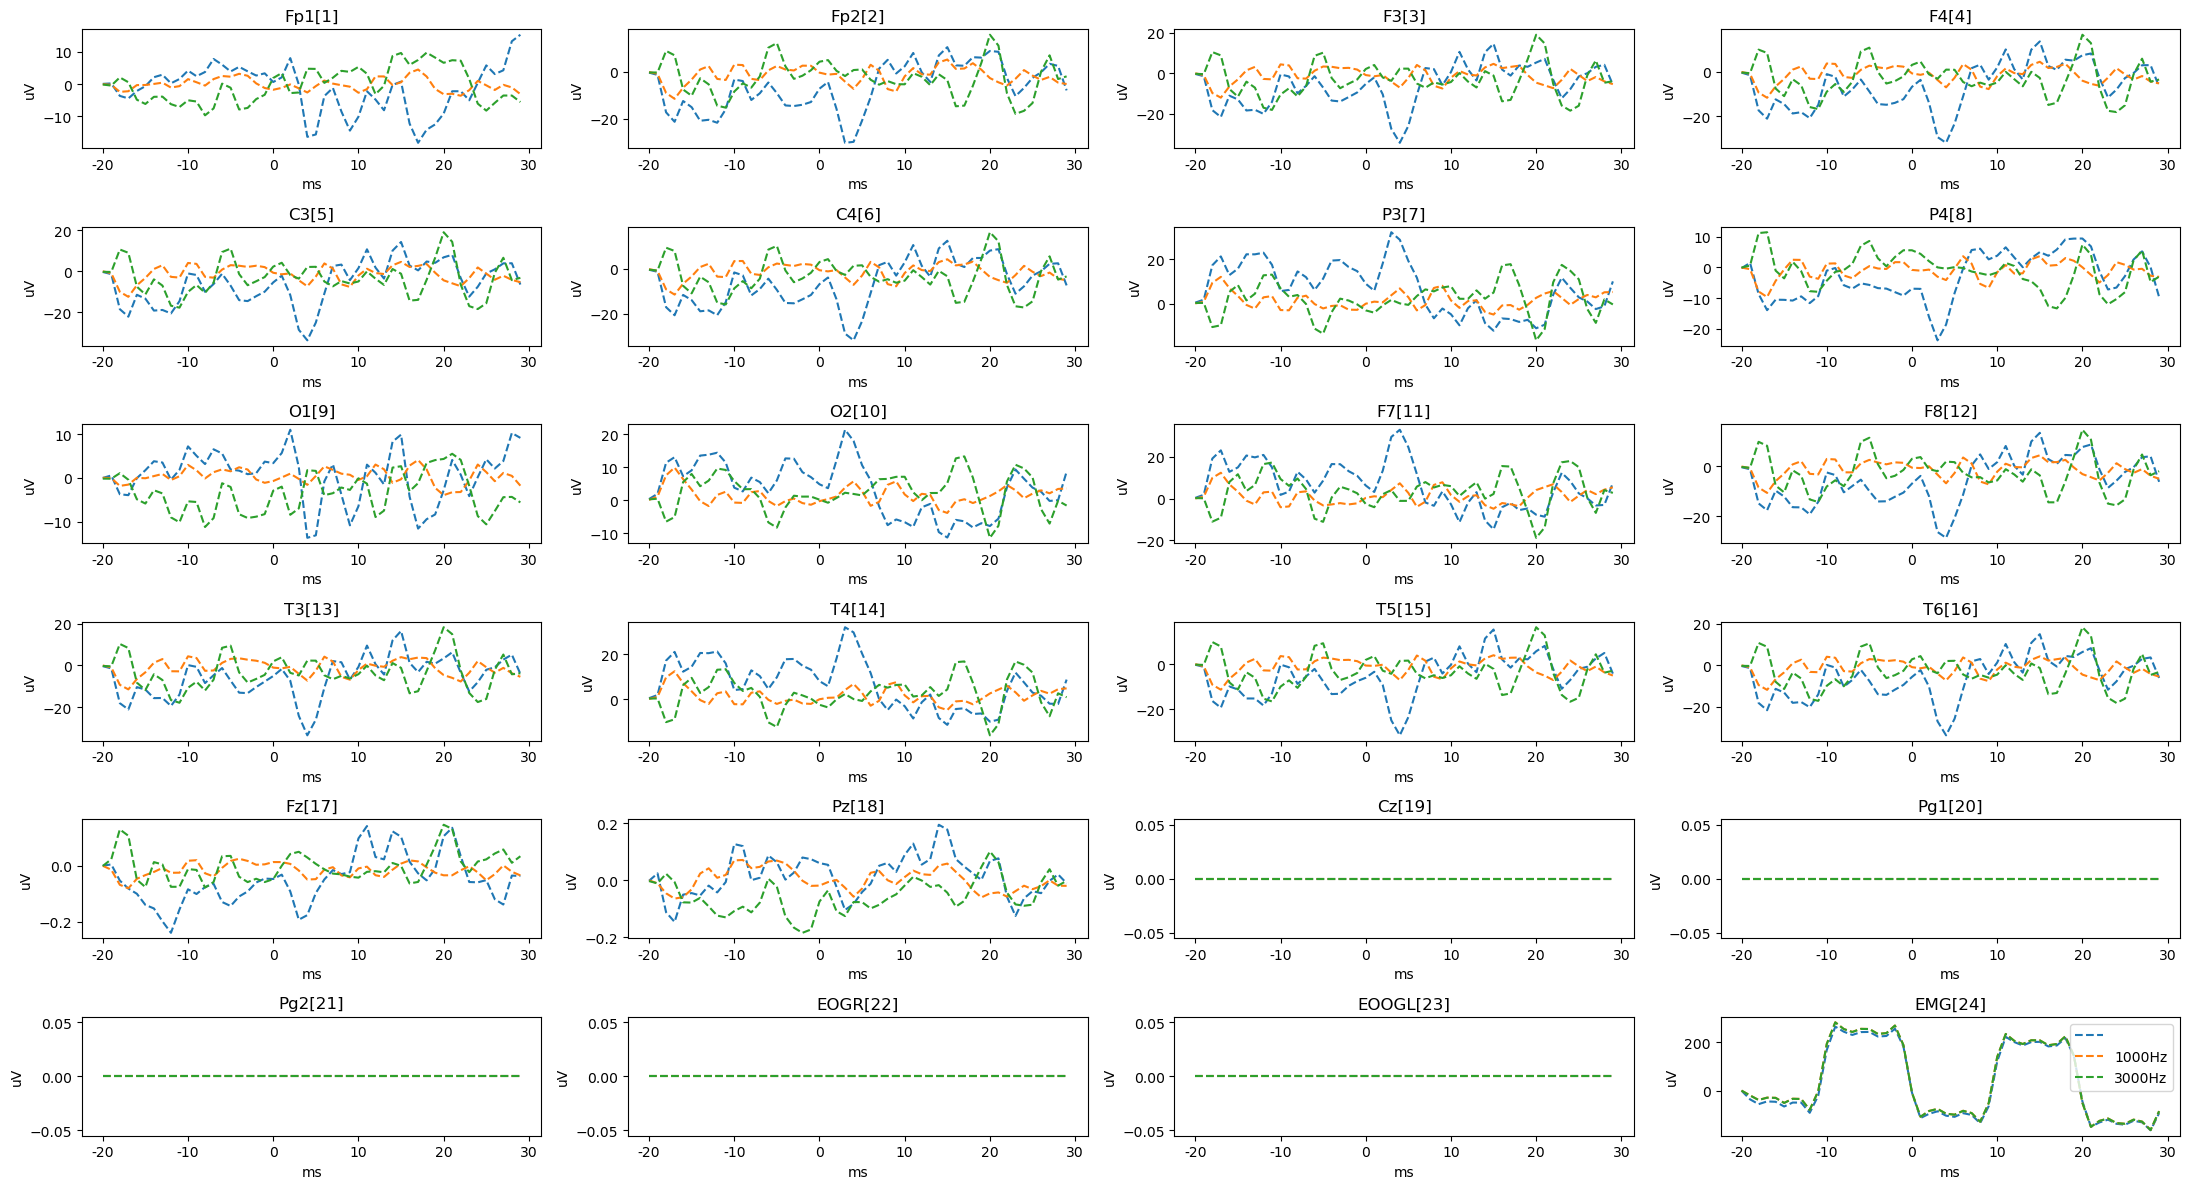

In [8]:
s_mmn_epoch=Epoch(100,1.3)

s4p4_epochs=s_mmn_epoch.subject_phase_epochs(2,4,all_patients_trials_data,all_patients_annotation,0.3)

s4p4_epochs_filtered = filter_epochs(s4p4_epochs,1,30,100)

s4p4_epochs_average = s_mmn_epoch.average_epochs(s4p4_epochs_filtered)

mmn_epoch.plot_by_channels(0,50,0.2,s4p4_epochs_average[0],electrodes,(22,12))

# plots

In [5]:
x=all_patients_trials_data[1][1][4][0:21,0]

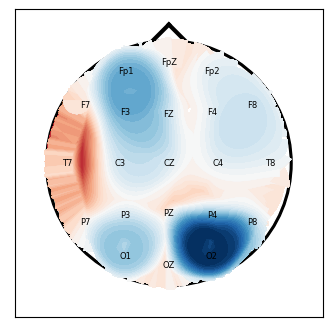

In [9]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
montage_plot(x,electrodes,ax)